In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

In [2]:
currID = 201935
df = pd.read_csv(str(currID)+'.csv')

In [3]:
df[100:105]

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
100,Shot Chart Detail,21800141,93,201935,James Harden,1610612745,Houston Rockets,1,4,6,...,Right Side(R),24+ ft.,23,237,25,1,1,20181105,IND,HOU
101,Shot Chart Detail,21800141,97,201935,James Harden,1610612745,Houston Rockets,1,3,41,...,Right Side Center(RC),24+ ft.,26,224,148,1,0,20181105,IND,HOU
102,Shot Chart Detail,21800141,215,201935,James Harden,1610612745,Houston Rockets,2,7,7,...,Center(C),Less Than 8 ft.,1,8,6,1,1,20181105,IND,HOU
103,Shot Chart Detail,21800141,238,201935,James Harden,1610612745,Houston Rockets,2,4,43,...,Left Side Center(LC),24+ ft.,26,-122,230,1,0,20181105,IND,HOU
104,Shot Chart Detail,21800141,259,201935,James Harden,1610612745,Houston Rockets,2,3,24,...,Right Side Center(RC),24+ ft.,30,106,283,1,0,20181105,IND,HOU


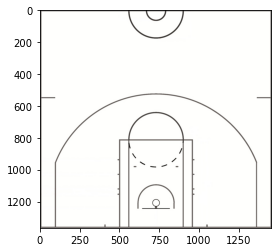

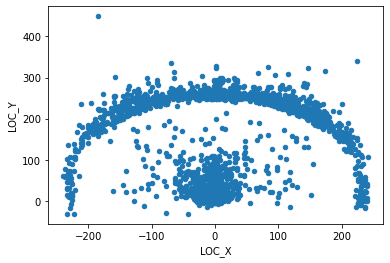

In [4]:
im = plt.imread('nba_court.jpeg')
implot = plt.imshow(im)

# plt.figure()
df.plot(kind = 'scatter', x='LOC_X', y='LOC_Y')
plt.show()

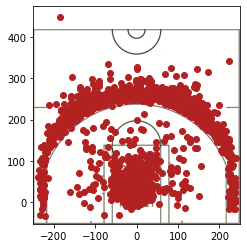

In [5]:
fig, ax = plt.subplots()

ax.imshow(im, extent=[-250, 250, -52, 418])
ax.plot(df['LOC_X'], df['LOC_Y'], 'o', linewidth=5, color='firebrick')


In [7]:
def create_court(ax, color):
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)
    
    # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
    
    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))

    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    
    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)
    
    return ax
    

In [8]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2


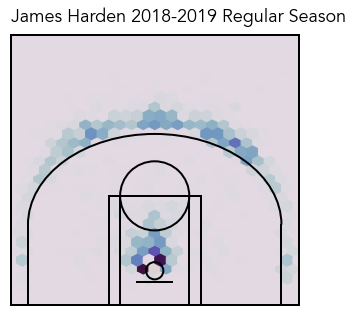

In [48]:
# Draw basketball court
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])


ax.hexbin(df['LOC_X'], df['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), cmap='twilight')

ax = create_court(ax, 'black')

# Annotate player name and season
playername = df['PLAYER_NAME'][0]
season = '-'.join([str(int(df['GAME_DATE'][0] // 1e4) + i) for i in range(2)])
ax.text(0, 1.05, playername + ' ' + season + ' Regular Season', transform=ax.transAxes, ha='left', va='baseline')

# Save and show figure
plt.savefig('ShotChart'+playername+season+'.png', dpi=300, bbox_inches='tight')
plt.show()
